### Credit Card Fraud Detection using Logistic Regression


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("CCfraud.csv")
# Separate features and target
X = dataset.iloc[:, :-1]
y = dataset["Class"]

In [5]:
# Checking for Missing Values
if dataset.isnull().sum().sum() == 0:
    print("\nNo missing values detected.")
else:
    print("\nMissing values found:")
    print(dataset.isnull().sum())


No missing values detected.


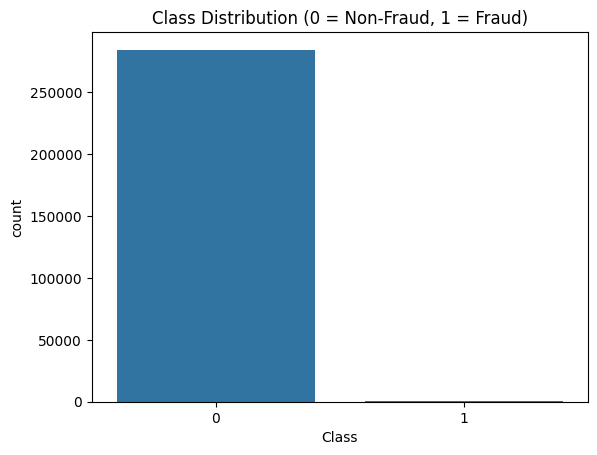

In [6]:
# Ploting class distribution
import seaborn as sns

sns.countplot(x="Class", data=dataset)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

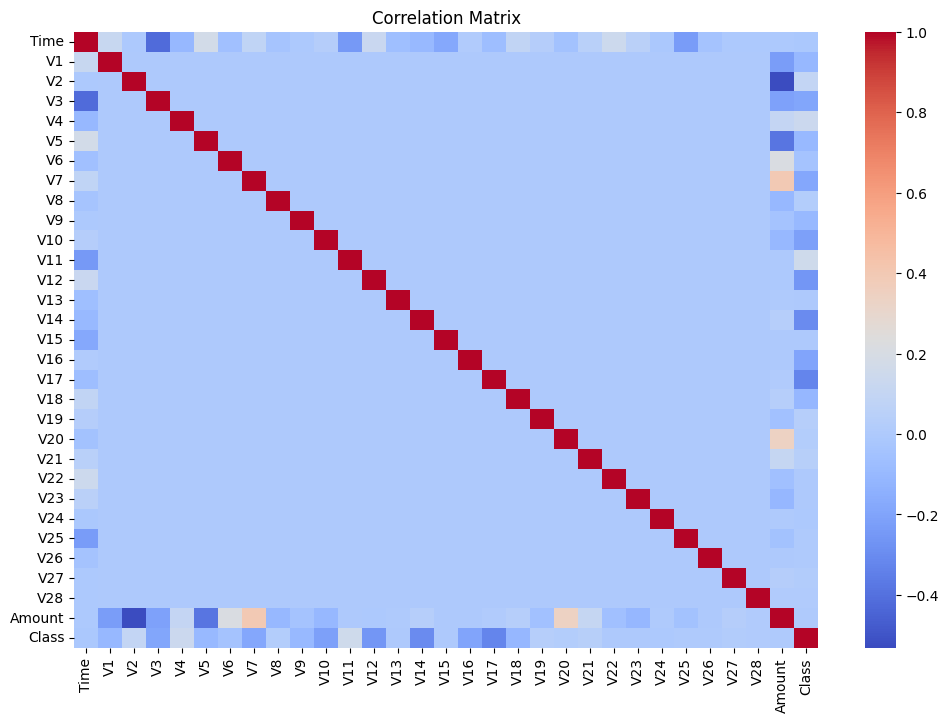

In [7]:
# Analyze correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Address Class Imbalance using SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Verify new class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


### Split Dataset in Training and Test Set 


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

### Training the Model 


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

### Model Evalautionn 



In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistics Regression
y_pred_logistic = logistic_model.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

# Random Forest Classifier
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726


Confusion Matrix:
[[55434  1429]
 [ 4348 52515]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56863
           1       1.00      0.98      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726


Confusion Matrix:
[[56761   102]
 [ 1178 55685]]


In [13]:
# ROC-AUC Score for both models
from sklearn.metrics import roc_auc_score

roc_auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"\nLogistic Regression ROC-AUC: {roc_auc_logistic:.4f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.4f}")


Logistic Regression ROC-AUC: 0.9899
Random Forest ROC-AUC: 0.9994


### Visualize Confusion Matrix for Random Forest

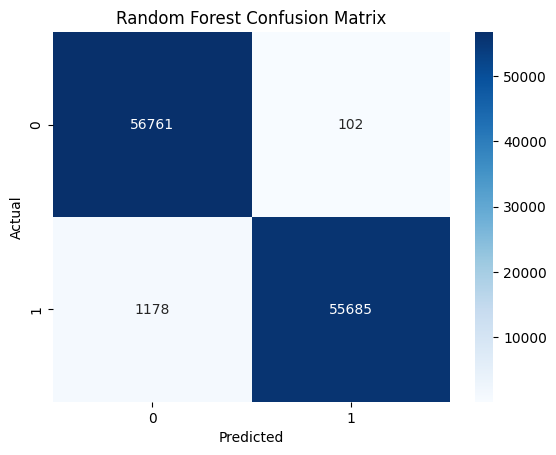

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

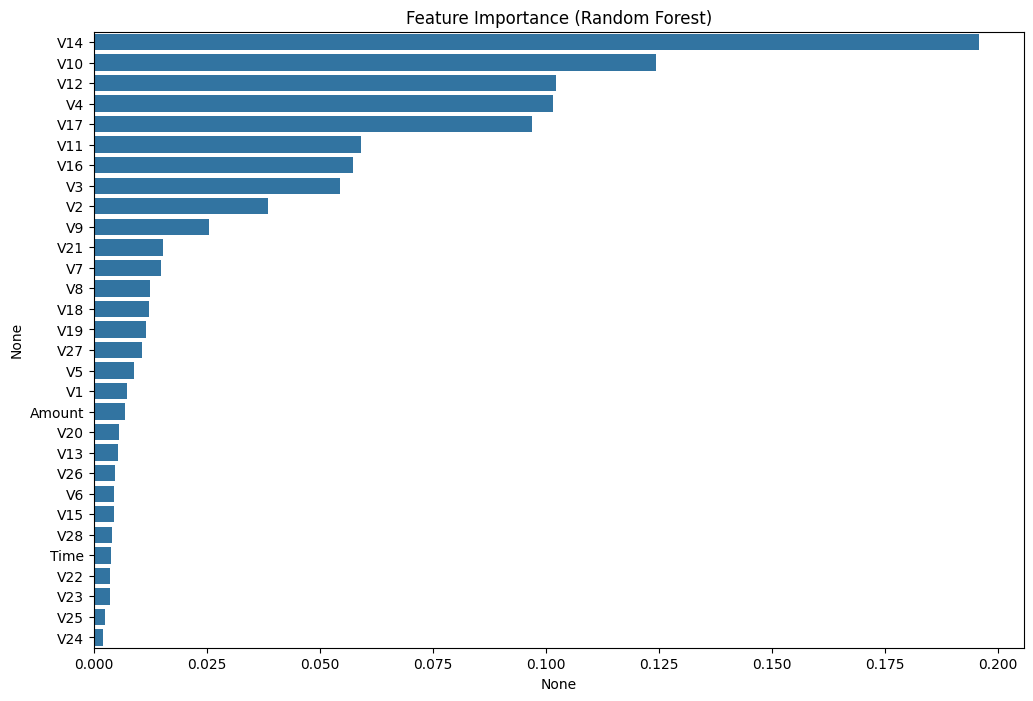

In [15]:
# Feature Importance (Random Forest)
feature_importance = pd.Series(
    rf_model.feature_importances_, index=dataset.columns[:-1]
).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

### Predicting if a Single Transactiom is Fraud or not 

In [16]:
transaction = [
    [
        0.1,
        -0.5,
        1.2,
        0.3,
        0.9,
        -1.3,
        0.2,
        0.6,
        -0.7,
        1.4,
        -0.4,
        0.7,
        -1.0,
        0.5,
        -0.6,
        1.0,
        -1.1,
        0.8,
        0.3,
        -0.2,
        0.4,
        -0.1,
        1.1,
        -0.5,
        0.9,
        -1.2,
        0.7,
        0.6,
        0.2,
        -0.8,
    ]
]

# Scale the transaction
scaled_transaction = scaler.transform(transaction)

# Predict the fraud status 
prediction = rf_model.predict(scaled_transaction)

# Print the result
print("Fraud" if prediction[0] == 1 else "Non-Fraud")

Non-Fraud


c:\Users\samar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
